In [1]:
#Importing the data and files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint

import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
print("Shape of the dataset is :",data.shape)
data.head()

Shape of the dataset is : (425, 11)


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


##### Dropping the unnamed column

In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)

##### NullValueCheck

In [4]:
data.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

##### Duplicate value Check and Deletion

In [5]:
print("Shape of the dataset before duplicates deletion is :",data.shape)
print('Number of duplicates in the dataset :',data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Shape of the dataset before duplicates deletion is :",data.shape)

Shape of the dataset before duplicates deletion is : (425, 10)
Number of duplicates in the dataset : 7
Shape of the dataset before duplicates deletion is : (418, 10)


In [6]:
print('********Checking the dtypes*********\n')
print(data.dtypes)
print('----------------------------------------------')
print('\n *********Checking the data info********* \n')
print(data.info())

********Checking the dtypes*********

Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object
----------------------------------------------

 *********Checking the data info********* 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      418 non-null    object
 1   Countries                 418 non-null    object
 2   Local                     418 non-null    object
 3   Industry Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident

From the above, it is clearly evident that all the columns of the data frame are of the type object.

##### Checking the Statistical Description

In [7]:
data.describe()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,418,418,418,418,418,418,418,418,418,418
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,When starting the activity of removing a coil ...
freq,6,248,89,237,309,141,396,185,229,2


In [8]:
#Renaming the data, countries,genre, employee or third party to date, country, gender and nature of employee
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Natureofemployee'}, inplace=True)

In [9]:
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


#### Finding the unique values of all the columns of the dataframe

In [10]:
col = data[data.columns[~data.columns.isin(['Date','Description'])]].columns.tolist()
for cols in col:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\n')

Unique values for Country is 
['Country_01' 'Country_02' 'Country_03']

Unique values for Local is 
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']

Unique values for Industry Sector is 
['Mining' 'Metals' 'Others']

Unique values for Accident Level is 
['I' 'IV' 'III' 'II' 'V']

Unique values for Potential Accident Level is 
['IV' 'III' 'I' 'II' 'V' 'VI']

Unique values for Gender is 
['Male' 'Female']

Unique values for Natureofemployee is 
['Third Party' 'Employee' 'Third Party (Remote)']

Unique values for Critical Risk is 
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 

#### Replacing and Labelling the values of the columns

In [11]:
replace_val = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(replace_val)
# replace_val = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}
# data['Accident Level'] = data['Accident Level'].map(replace_val)
# replace_val = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4, 'VI': 5}
# data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_val)
del replace_val

In [12]:
data.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


#### Changing the date column to date format

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

#### Extracting the month, year and day column to the data.

In [14]:
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())

In [15]:
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday
0,2016-01-01,Country_01,1,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday
1,2016-01-02,Country_02,2,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday
2,2016-01-06,Country_01,3,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday
3,2016-01-08,Country_01,4,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday
4,2016-01-10,Country_01,4,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday


#### Function to create month into seasons

In [16]:
# function to create month into seasons
def convert_to_season(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

data['Season'] = data['Month'].apply(convert_to_season)
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season
0,2016-01-01,Country_01,1,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer
1,2016-01-02,Country_02,2,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer
2,2016-01-06,Country_01,3,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer


#### Univariate analysis covering Count, Pie, Scatter, Histogram plots

In [17]:
features=['Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Natureofemployee',
       'Critical Risk', 'Year', 'Month', 'Weekday', 'Season']


In [18]:
def univariate_analysis_categorical(dataset,feature):
    
    
    print("\n")
    print("===========================================================================================")
    print("Univariate Analysis of feature: ",feature)
    print("===========================================================================================\n")
        
           
    print("Unique values: ",feature)
    print("-----------------")        
    print(dataset[feature].unique()) 
        
        
    print("\n")  
    print("-----------------")
    print("Countplot  for feature: ",feature)
    print("-----------------")
        
    plt.figure(figsize=(10,6))
    sns.countplot(dataset[feature],order = dataset[feature].value_counts().index)
    plt.xticks(rotation = 'vertical')
    plt.show()
    
    print("-----------------")
    print("Pie Chart for feature: ",feature)
    print("------------------")      
        
    labels=dataset[feature].unique()
    plt.figure(figsize=(10,6))
    dataset[feature].value_counts().plot.pie(autopct="%.1f%%")
    plt.show()
        
    print("\n")
    print("-----------------")
    print("Histplot  for feature: ",feature)
    print("-------------------")
        
    plt.figure(figsize=(10,6))
    sns.histplot(dataset[feature])
    plt.show()      
    
    print("\n")
    print("-----------------")
    print("Value Counts for feature: ",feature)
    print("-------------------")
    
    print(dataset[feature].value_counts().sort_values(ascending=False))

In [19]:
#!pip install pyqt5

#### 1.Country



Univariate Analysis of feature:  Country

Unique values:  Country
-----------------
['Country_01' 'Country_02' 'Country_03']


-----------------
Countplot  for feature:  Country
-----------------


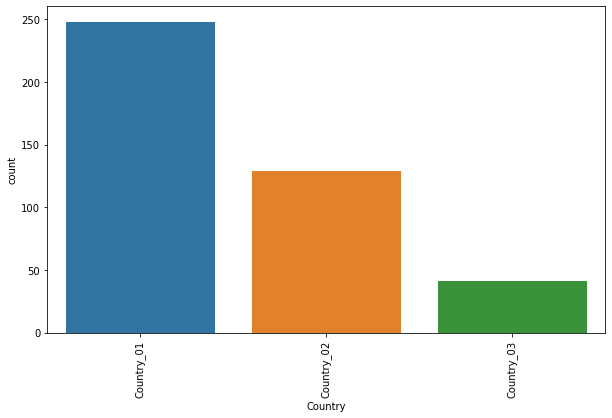

-----------------
Pie Chart for feature:  Country
------------------


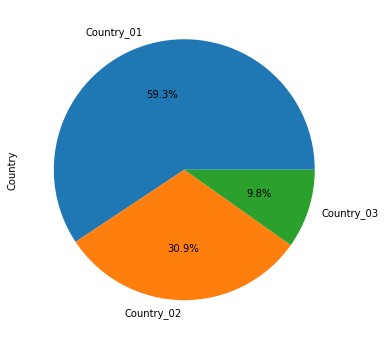



-----------------
Histplot  for feature:  Country
-------------------


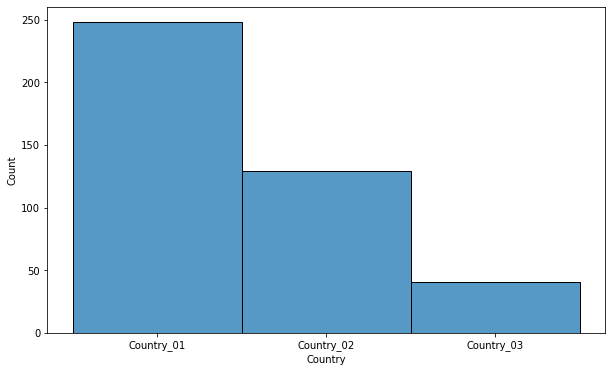



-----------------
Value Counts for feature:  Country
-------------------
Country_01    248
Country_02    129
Country_03     41
Name: Country, dtype: int64


In [20]:
univariate_analysis_categorical(data,'Country')

----- From the above plots, we can conclude the following

1. The country_01 has a count of about 248. Country _02 has a count of about 129. Country_03 has a count of about 41.

2. From the above pie chart, it can be infered that the country _01 is the most affected country with about 59% accidents and country_03 is the least affected country.

3. From the above output, the country_01 has maximum accidents and country_03 has minimum accidents.

##### 2.Local



Univariate Analysis of feature:  Local

Unique values:  Local
-----------------
[ 1  2  3  4  5  6  7  8 10  9 11 12]


-----------------
Countplot  for feature:  Local
-----------------


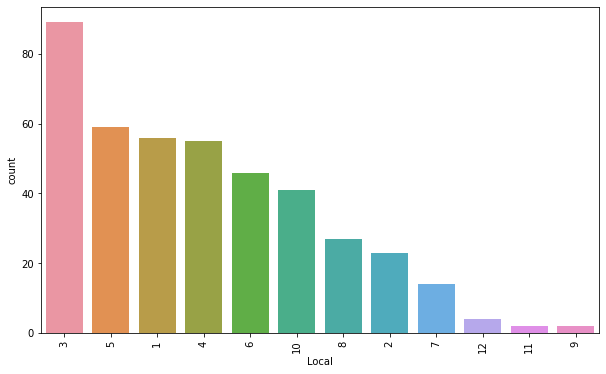

-----------------
Pie Chart for feature:  Local
------------------


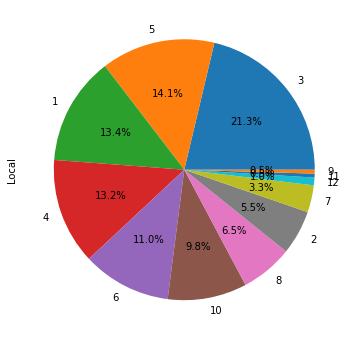



-----------------
Histplot  for feature:  Local
-------------------


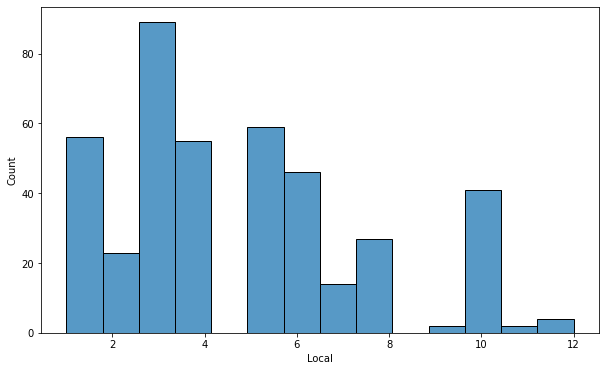



-----------------
Value Counts for feature:  Local
-------------------
3     89
5     59
1     56
4     55
6     46
10    41
8     27
2     23
7     14
12     4
9      2
11     2
Name: Local, dtype: int64


In [21]:
#Count plot
univariate_analysis_categorical(data,'Local')

1. Most of the accidents happen in Local_03 with a count of about 89.
2. Maximum accidents are taken place in local_03 with 21.18% and least accidents are taken place in local_09 and local_11 with 0.47%.
3. From the above output, it can be infered that the local_03 is more prone to accidents.
4. From the above histogram, it can be observed that the number of accidents in Local_03 are about 90.

##### 3.Industry sector



Univariate Analysis of feature:  Industry Sector

Unique values:  Industry Sector
-----------------
['Mining' 'Metals' 'Others']


-----------------
Countplot  for feature:  Industry Sector
-----------------


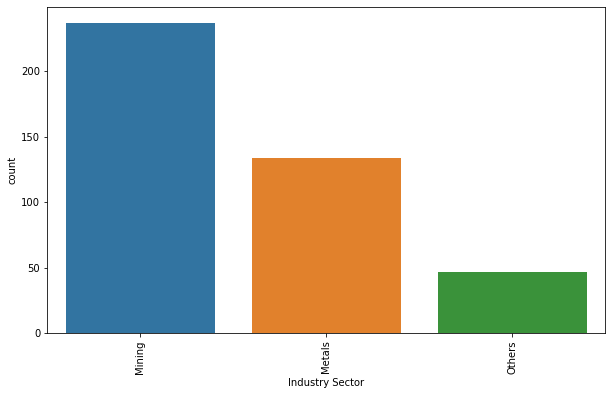

-----------------
Pie Chart for feature:  Industry Sector
------------------


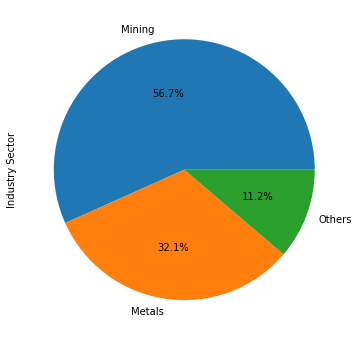



-----------------
Histplot  for feature:  Industry Sector
-------------------


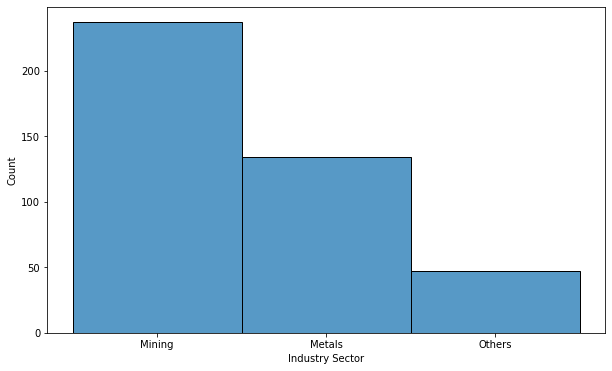



-----------------
Value Counts for feature:  Industry Sector
-------------------
Mining    237
Metals    134
Others     47
Name: Industry Sector, dtype: int64


In [22]:
univariate_analysis_categorical(data,'Industry Sector')

1. From the above, it is evident that the mining is prone to more accidents with about 237.
2. It can be observed that the mostly affected sector is Mining sector. 56.71% of accidents occur in Mining sector.
3. It is clearly evident that the mining is prone to more accidents

##### 4.Accident level



Univariate Analysis of feature:  Accident Level

Unique values:  Accident Level
-----------------
['I' 'IV' 'III' 'II' 'V']


-----------------
Countplot  for feature:  Accident Level
-----------------


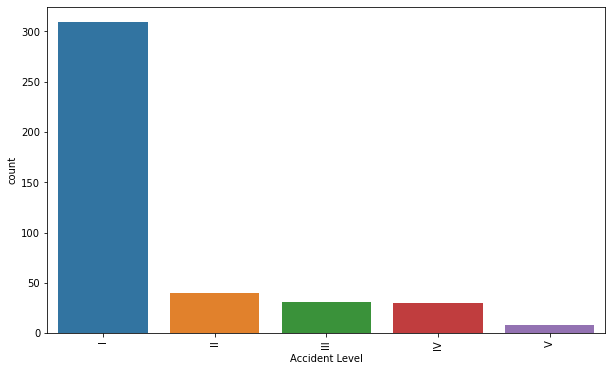

-----------------
Pie Chart for feature:  Accident Level
------------------


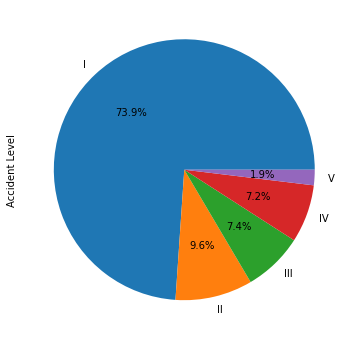



-----------------
Histplot  for feature:  Accident Level
-------------------


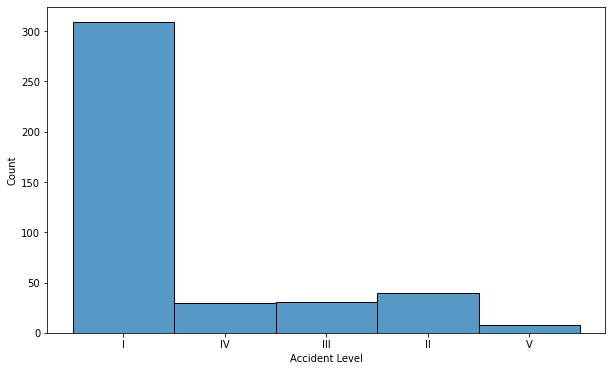



-----------------
Value Counts for feature:  Accident Level
-------------------
I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64


In [23]:
univariate_analysis_categorical(data,'Accident Level')

1. From the above count plot, it is clearly evident that the most accidents belongs to "Accident Level" "1" with a count of about more than 300.
2. From the above pie chart, it can be determined that the maximum accidents are of level 1 equivalent to about 73.9%


##### 5.potential accident level



Univariate Analysis of feature:  Potential Accident Level

Unique values:  Potential Accident Level
-----------------
['IV' 'III' 'I' 'II' 'V' 'VI']


-----------------
Countplot  for feature:  Potential Accident Level
-----------------


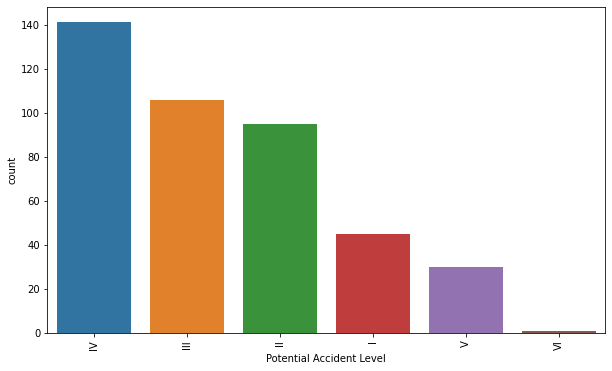

-----------------
Pie Chart for feature:  Potential Accident Level
------------------


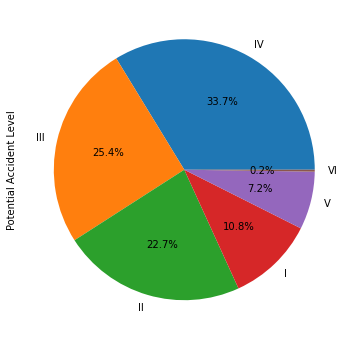



-----------------
Histplot  for feature:  Potential Accident Level
-------------------


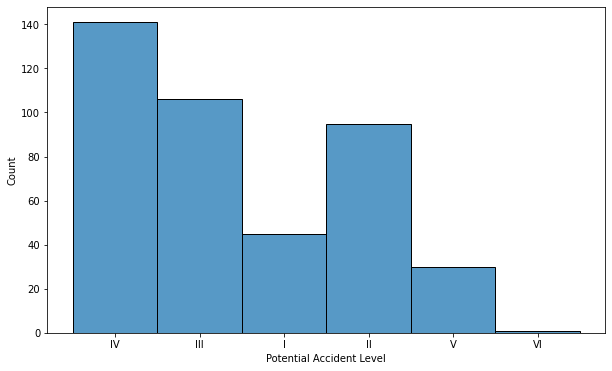



-----------------
Value Counts for feature:  Potential Accident Level
-------------------
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential Accident Level, dtype: int64


In [24]:
univariate_analysis_categorical(data,'Potential Accident Level')

1. From the above count plot, it can be determined that the most "Potential Accident Level" belongs to level IV with a count of about 141.
2. From the above pie chart, it is evident that most "Potential Accident Level" belongs to level IV with 33.7%.

##### 6.Gender



Univariate Analysis of feature:  Gender

Unique values:  Gender
-----------------
['Male' 'Female']


-----------------
Countplot  for feature:  Gender
-----------------


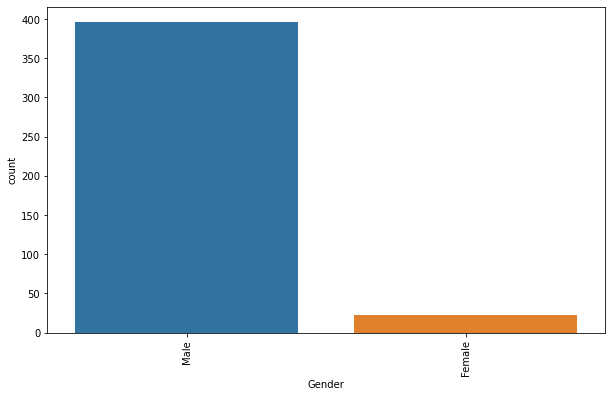

-----------------
Pie Chart for feature:  Gender
------------------


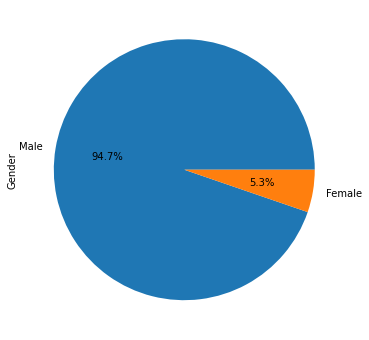



-----------------
Histplot  for feature:  Gender
-------------------


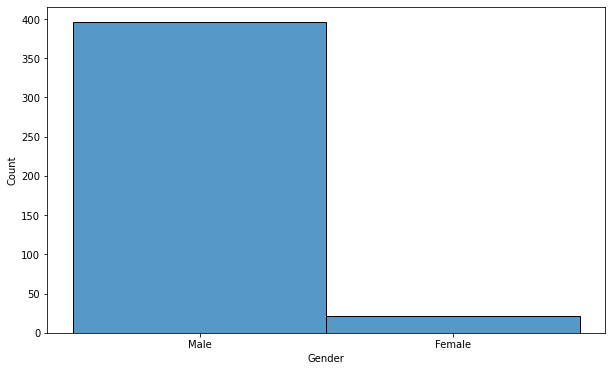



-----------------
Value Counts for feature:  Gender
-------------------
Male      396
Female     22
Name: Gender, dtype: int64


In [25]:
univariate_analysis_categorical(data,'Gender')

1. From the above plot, it is evident that Most affected wokers in accidents are male with a count of 396.
2. From the above pie chart, it is evient that most affected wokers in accidents are male.

##### 7.Nature of the employee



Univariate Analysis of feature:  Natureofemployee

Unique values:  Natureofemployee
-----------------
['Third Party' 'Employee' 'Third Party (Remote)']


-----------------
Countplot  for feature:  Natureofemployee
-----------------


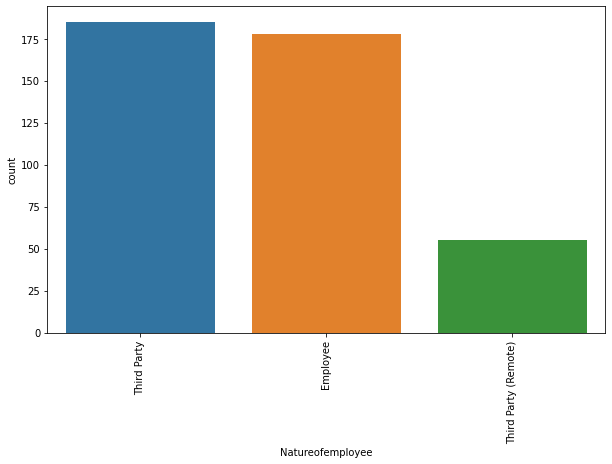

-----------------
Pie Chart for feature:  Natureofemployee
------------------


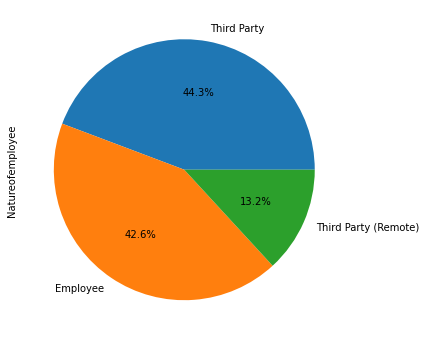



-----------------
Histplot  for feature:  Natureofemployee
-------------------


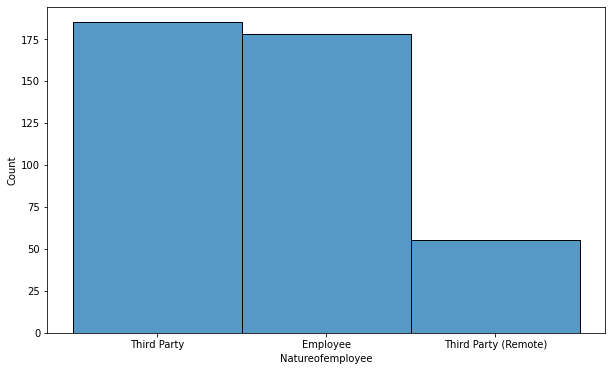



-----------------
Value Counts for feature:  Natureofemployee
-------------------
Third Party             185
Employee                178
Third Party (Remote)     55
Name: Natureofemployee, dtype: int64


In [26]:
univariate_analysis_categorical(data,'Natureofemployee')

From the above it can be determined that the employee type of Third party are prone to accidents.

###### 8.Critical risk



Univariate Analysis of feature:  Critical Risk

Unique values:  Critical Risk
-----------------
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipment' 'Projection/Choco' 'Machine Protection'
 'Power lock' 'Burn' 'Projection/Manual Tools'
 'Individual protection equipment' 'Electrical Shock'
 'Projection of fragments']


-----------------
Countplot  for feature:  Critical Risk
-----------------


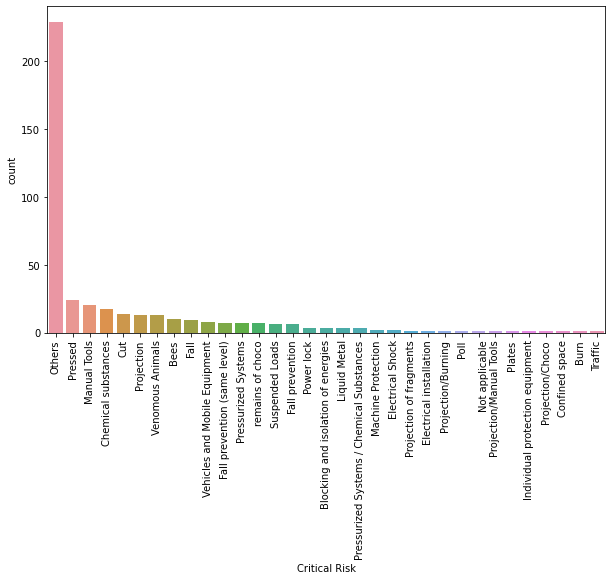

-----------------
Pie Chart for feature:  Critical Risk
------------------


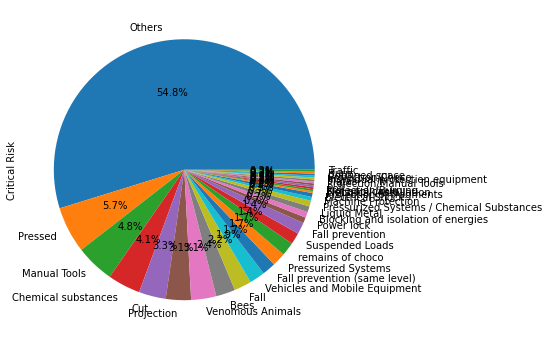



-----------------
Histplot  for feature:  Critical Risk
-------------------


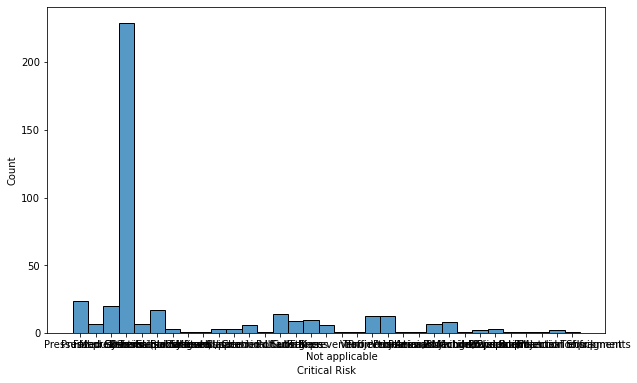



-----------------
Value Counts for feature:  Critical Risk
-------------------
Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Projection                                    13
Venomous Animals                              13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
Pressurized Systems                            7
remains of choco                               7
Suspended Loads                                6
Fall prevention                                6
Power lock                                     3
Blocking and isolation of energies             3
Liquid Metal                                   3
Pressurized Systems / Chemical Substa

In [27]:
#Count plot
# plt.figure(figsize=(20,5))
# descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
# sns.countplot(x=data['Critical Risk'],order=descending_order);
# plt.xticks(rotation = 'vertical')

univariate_analysis_categorical(data,'Critical Risk')

When we count the number of incidents by each type of critical risk, Others tops the list.

###### 9.Year



Univariate Analysis of feature:  Year

Unique values:  Year
-----------------
[2016 2017]


-----------------
Countplot  for feature:  Year
-----------------


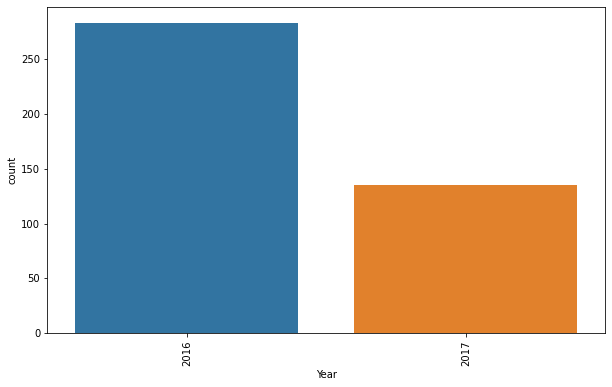

-----------------
Pie Chart for feature:  Year
------------------


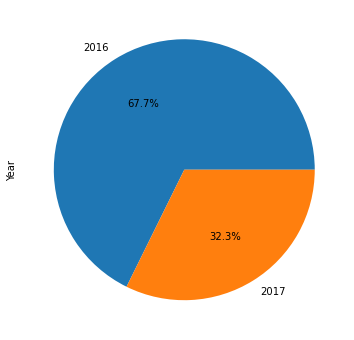



-----------------
Histplot  for feature:  Year
-------------------


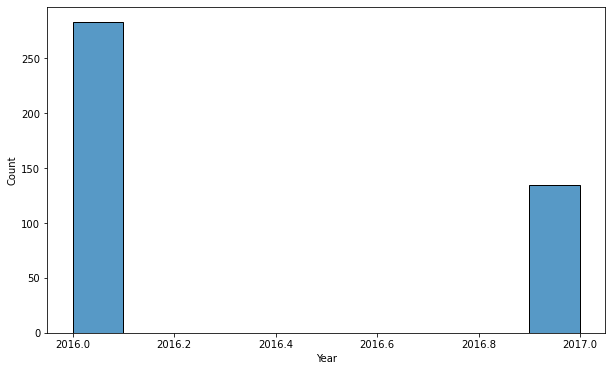



-----------------
Value Counts for feature:  Year
-------------------
2016    283
2017    135
Name: Year, dtype: int64


In [28]:
univariate_analysis_categorical(data,'Year')

From the above, it is clearly evident that most accidents happend in year 2016. i.e- more than 250.

##### 10.Month



Univariate Analysis of feature:  Month

Unique values:  Month
-----------------
[ 1  2  3  4  5  6  7  8  9 10 11 12]


-----------------
Countplot  for feature:  Month
-----------------


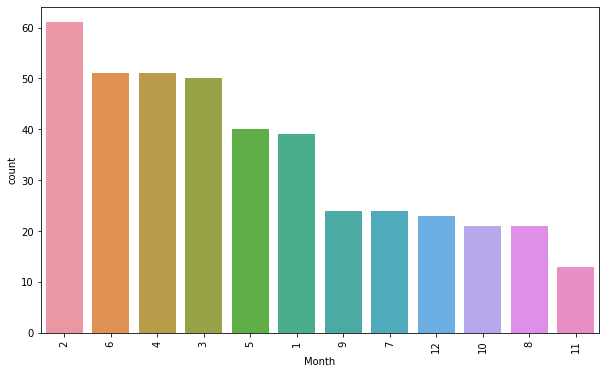

-----------------
Pie Chart for feature:  Month
------------------


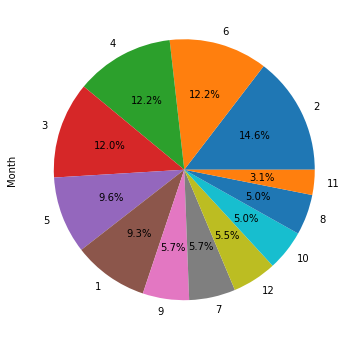



-----------------
Histplot  for feature:  Month
-------------------


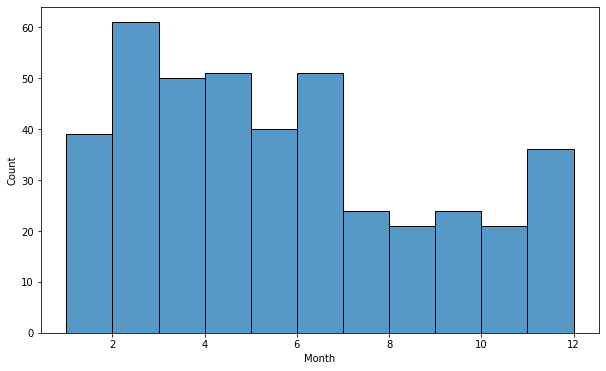



-----------------
Value Counts for feature:  Month
-------------------
2     61
4     51
6     51
3     50
5     40
1     39
7     24
9     24
12    23
8     21
10    21
11    13
Name: Month, dtype: int64


In [29]:
univariate_analysis_categorical(data,'Month')

1. From the above, it can be determined that the most accidents are of month Feb.
2. From the above, it is evident that most of the accidents happened in feb equivalent to 14.6%.

##### 11.WeekDay



Univariate Analysis of feature:  Weekday

Unique values:  Weekday
-----------------
['Friday' 'Saturday' 'Wednesday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']


-----------------
Countplot  for feature:  Weekday
-----------------


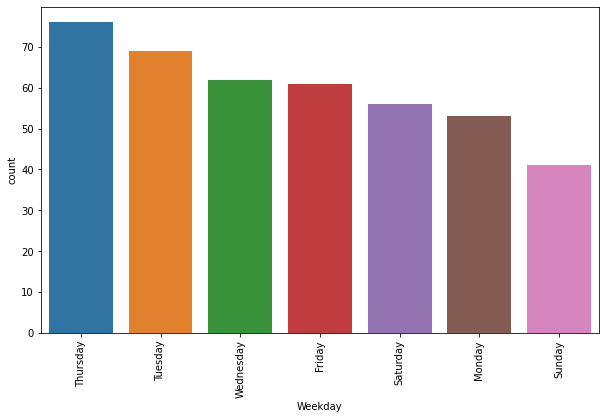

-----------------
Pie Chart for feature:  Weekday
------------------


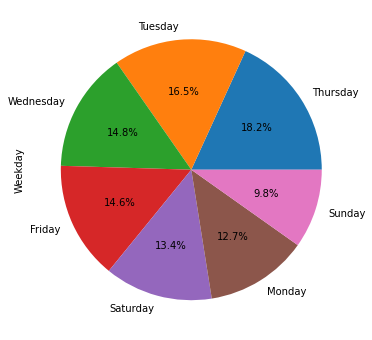



-----------------
Histplot  for feature:  Weekday
-------------------


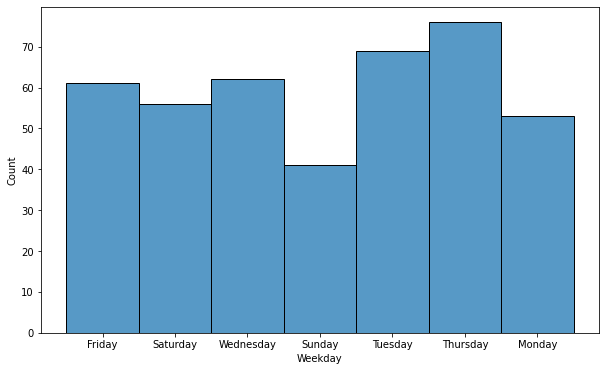



-----------------
Value Counts for feature:  Weekday
-------------------
Thursday     76
Tuesday      69
Wednesday    62
Friday       61
Saturday     56
Monday       53
Sunday       41
Name: Weekday, dtype: int64


In [30]:
univariate_analysis_categorical(data,'Weekday')

1. From the above count plot, it can be determined that max accidents happened on thursday with approximately 76 accidents.
2. From the above piechart, it is evident that most accidents happend in Thursday equivalent to 18.2%

### Bivariate analysis

### Gender vs RestAll

##### 1.Gender vs Accident level

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

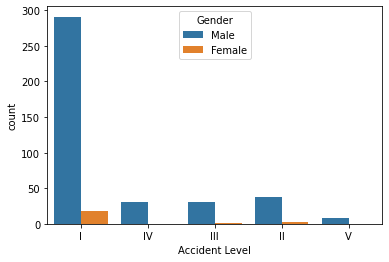

In [31]:
sns.countplot(x="Accident Level",hue="Gender", data=data)

In [32]:
bivariate_analysis_df = pd.crosstab(index=data['Accident Level'],columns=data['Gender'])

print("------------------------------------------")
print("Cross table Analysis of features: ",'Accident Level',' and  ', 'Gender')
print("------------------------------------------")
display(bivariate_analysis_df)  

------------------------------------------
Cross table Analysis of features:  Accident Level  and   Gender
------------------------------------------


Gender,Female,Male
Accident Level,,
I,18,291
II,3,37
III,1,30
IV,0,30
V,0,8


From the above count plot, it can be determined that the most of the accidents happened at level I with gender male.

#### 2.Gender vs Potential Accident Level

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

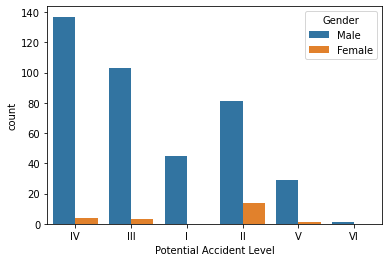

In [33]:
sns.countplot(x="Potential Accident Level",hue="Gender", data=data)

In [34]:
bivariate_analysis_df = pd.crosstab(index=data['Potential Accident Level'],columns=data['Gender'])

print("\n Cross table Analysis of features: ",'Potential Accident Level',' and  ', 'Gender')
print("--------------------------------------------------------------------------")
display(bivariate_analysis_df)  


 Cross table Analysis of features:  Potential Accident Level  and   Gender
--------------------------------------------------------------------------


Gender,Female,Male
Potential Accident Level,,
I,0,45
II,14,81
III,3,103
IV,4,137
V,1,29
VI,0,1


From the above,it can be determined that most of the potential level accidents happened to male compared to female, of which Potential Accident Level of IV is dominant

#### 3.Gender vs Country

<AxesSubplot:xlabel='Country', ylabel='count'>

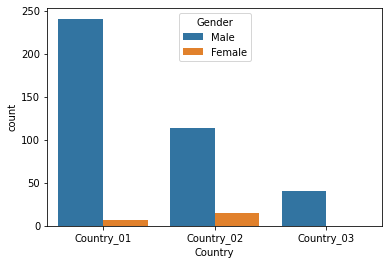

In [35]:
sns.countplot(x="Country",hue="Gender", data=data)

In [36]:
bivariate_analysis_df = pd.crosstab(index=data['Country'],columns=data['Gender'])

print("\n Cross table Analysis of features: ",'Country',' and  ', 'Gender')
print("------------------------------------------------------")
display(bivariate_analysis_df)  


 Cross table Analysis of features:  Country  and   Gender
------------------------------------------------------


Gender,Female,Male
Country,,
Country_01,7,241
Country_02,15,114
Country_03,0,41


From the above countplot, it can be determined that the maximum number of accidents took place in country_01 to males and they are about 241.

##### 4.Gender vs Industry Sector

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

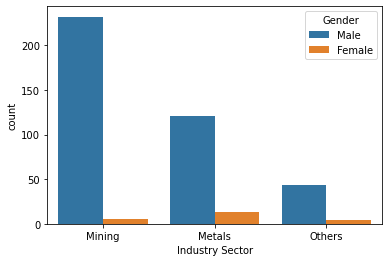

In [37]:
#count plot to determine the number of accidents happened due to industry sector with their gender
sns.countplot(x="Industry Sector",hue="Gender", data=data)

In [38]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Gender'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Gender')
print("------------------------------------------------------")
display(bivariate_analysis_df)  


 Cross table Analysis of features:  Industry Sector  and   Gender
------------------------------------------------------


Gender,Female,Male
Industry Sector,,
Metals,13,121
Mining,5,232
Others,4,43


From the above count plot, it is evident that most of the accidents happened to Male in the mining sector, around 232.

##### 5.Gender vs Year

<AxesSubplot:xlabel='Year', ylabel='count'>

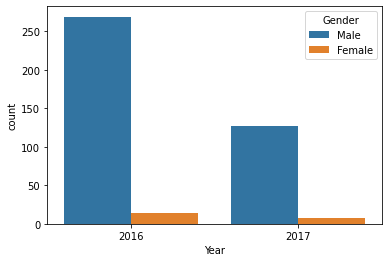

In [39]:
#Countplot to find in which max accidents took place to both female and male
sns.countplot(x="Year",hue="Gender", data=data)

In [40]:
bivariate_analysis_df = pd.crosstab(index=data['Year'],columns=data['Gender'])

print("\n Cross table Analysis of features: ",'Year',' and  ', 'Gender')
print("------------------------------------------------------")
display(bivariate_analysis_df)  


 Cross table Analysis of features:  Year  and   Gender
------------------------------------------------------


Gender,Female,Male
Year,,
2016,14,269
2017,8,127


From the above countplot, it is clearly evident that maximum accidents took place in 2016 to the male when compared to female with a count of 269.

#### 6.Gender vs month

<AxesSubplot:xlabel='Month', ylabel='count'>

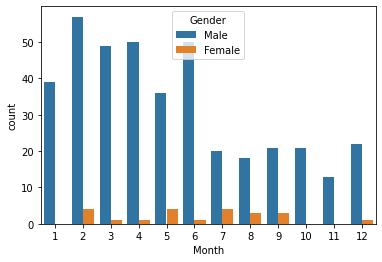

In [41]:
#Countplot to determine in which month the maximum accidents took place to both female and males
sns.countplot(x="Month",hue="Gender", data=data)

In [42]:
bivariate_analysis_df = pd.crosstab(index=data['Month'],columns=data['Gender'])

print("\n Cross table Analysis of features: ",'Month',' and  ', 'Gender')
print("------------------------------------------------------")
display(bivariate_analysis_df)  


 Cross table Analysis of features:  Month  and   Gender
------------------------------------------------------


Gender,Female,Male
Month,,
1,0,39
2,4,57
3,1,49
4,1,50
5,4,36
6,1,50
7,4,20
8,3,18
9,3,21


From the above count plot, it is determined that maximum number of accidents happened to male in the month feb with a count 57.

##### 7.Gender vs weekday

<AxesSubplot:xlabel='Weekday', ylabel='count'>

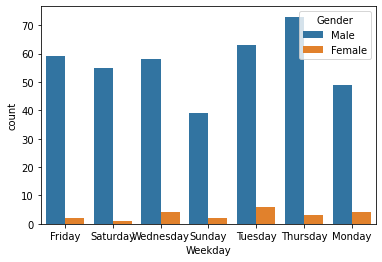

In [43]:
#Countplot to find out on which day max accidents took place to the both genders
sns.countplot(x="Weekday",hue="Gender", data=data)

In [44]:
bivariate_analysis_df = pd.crosstab(index=data['Weekday'],columns=data['Gender'])

print("\n Cross table Analysis of features: ",'Weekday',' and  ', 'Gender')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Weekday  and   Gender
------------------------------------------------------


Gender,Female,Male
Weekday,,
Friday,2,59
Monday,4,49
Saturday,1,55
Sunday,2,39
Thursday,3,73
Tuesday,6,63
Wednesday,4,58


Max accidents happened to male on thursday with a count of more than 73

##### 8. Gender vs Nature of Employee

<AxesSubplot:xlabel='Natureofemployee', ylabel='count'>

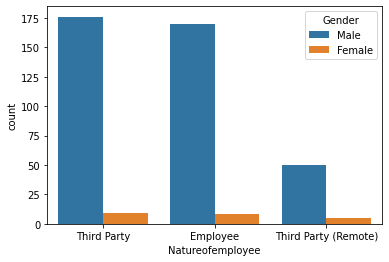

In [45]:
#count plot to determine which type of employee and gender faced most of the accidents
sns.countplot(x="Natureofemployee",hue="Gender", data=data)

In [46]:
bivariate_analysis_df = pd.crosstab(index=data['Natureofemployee'],columns=data['Gender'])

print("\n Cross table Analysis of features: ",'Natureofemployee',' and  ', 'Gender')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Natureofemployee  and   Gender
------------------------------------------------------


Gender,Female,Male
Natureofemployee,,
Employee,8,170
Third Party,9,176
Third Party (Remote),5,50


From the above output, it is clearly evident that maximum accidents happened to third party male employees. i.e- 176.

##### 9. Gender vs Critical Risk

<AxesSubplot:xlabel='Critical Risk', ylabel='count'>

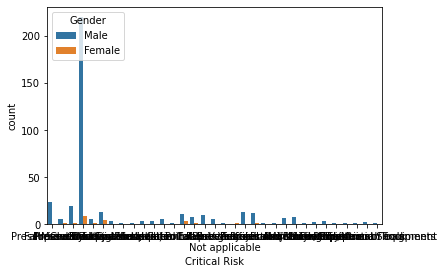

In [141]:
#count plot to determine which type of employee and gender faced most of the accidents
sns.countplot(x="Critical Risk",hue="Gender", data=data)

In [140]:
bivariate_analysis_df = pd.crosstab(index=data['Critical Risk'],columns=data['Gender'])

print("\n Cross table Analysis of features: ",'Critical Risk',' and  ', 'Gender')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Critical Risk  and   Gender
------------------------------------------------------


Gender,Female,Male
Critical Risk,,
\nNot applicable,0,1
Bees,0,10
Blocking and isolation of energies,0,3
Burn,0,1
Chemical substances,4,13
Confined space,0,1
Cut,3,11
Electrical Shock,0,2
Electrical installation,0,1


Critical Risk of type "Others" is dominant across both Male and Female Genders

### Industry sector vs RestAll

##### 1. Industry Sector Vs Accident Level

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

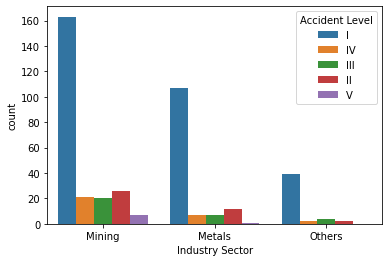

In [47]:
#Countplot to determine the accident level happened at different industry sectors
sns.countplot(x="Industry Sector",hue="Accident Level", data=data)

In [48]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Accident Level'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Accident Level')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Industry Sector  and   Accident Level
------------------------------------------------------


Accident Level,I,II,III,IV,V
Industry Sector,,,,,
Metals,107,12,7,7,1
Mining,163,26,20,21,7
Others,39,2,4,2,0


Maximum number of accidents happened in the mining sector with accident Level I. i.e- 163.

##### 2.Industry sector vs potential accident level

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

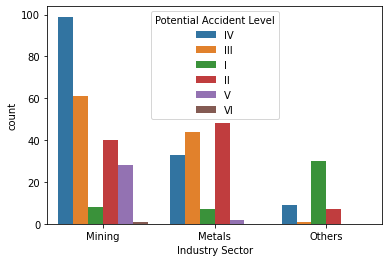

In [49]:
#Countplot to determine the potential accident level according to the industry sector
sns.countplot(x="Industry Sector",hue="Potential Accident Level", data=data)

In [50]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Potential Accident Level'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Potential Accident Level')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Industry Sector  and   Potential Accident Level
------------------------------------------------------


Potential Accident Level,I,II,III,IV,V,VI
Industry Sector,,,,,,
Metals,7,48,44,33,2,0
Mining,8,40,61,99,28,1
Others,30,7,1,9,0,0


Maximum number of accidents happened in the potential accident level 4 and mining sector with a count 99. Minimum number of accidents took place in the mining sector at a potential accident level 6.

##### 3.Industry Sector vs Critical Risk

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Pressed'),
  Text(1, 0, 'Pressurized Systems'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Fall prevention (same level)'),
  Text(5, 0, 'Chemical substances'),
  Text(6, 0, 'Liquid Metal'),
  Text(7, 0, 'Electrical installation'),
  Text(8, 0, 'Confined space'),
  Text(9, 0, 'Pressurized Systems / Chemical Substances'),
  Text(10, 0, 'Blocking and isolation of energies'),
  Text(11, 0, 'Suspended Loads'),
  Text(12, 0, 'Poll'),
  Text(13, 0, 'Cut'),
  Text(14, 0, 'Fall'),
  Text(15, 0, 'Bees'),
  Text(16, 0, 'Fall prevention'),
  Text(17, 0, '\nNot applicable'),
  Text(18, 0, 'Traffic'),
  Text(19, 0, 'Projection'),
  Text(20, 0, 'Venomous Animals'),
  Text(21, 0, 'Plates'),
  Text(22, 0, 'Projection/Burning'),
  Text(23, 0, 'remains of choco'),
  Text(24, 0, 'Vehicles and Mobile Equipment'),
  Text(

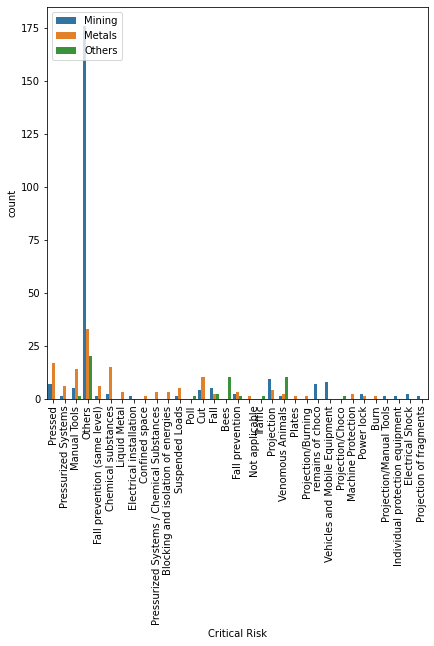

In [51]:
#Countplot to determine the number of accidents taken place at the industry sector wrt critical risk
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Critical Risk', data = data, ax = ax, orient = 'v',
                  hue = 'Industry Sector')
plt.legend(labels = data['Industry Sector'].unique())
plt.xticks(rotation = 90)

In [52]:
bivariate_analysis_df = pd.crosstab(index=data['Critical Risk'],columns=data['Industry Sector'])

print("\n Cross table Analysis of features: ",'Critical Risk',' and  ', 'Industry Sector')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Critical Risk  and   Industry Sector
------------------------------------------------------


Industry Sector,Metals,Mining,Others
Critical Risk,,,
\nNot applicable,1,0,0
Bees,0,0,10
Blocking and isolation of energies,3,0,0
Burn,1,0,0
Chemical substances,15,2,0
Confined space,1,0,0
Cut,10,4,0
Electrical Shock,0,2,0
Electrical installation,0,1,0


From the above count plot, it is evident that maximum number of accidents happened in mining with a critical risk of others. i.e- about 175

##### 4.Industry sector vs Local

<AxesSubplot:xlabel='Local', ylabel='count'>

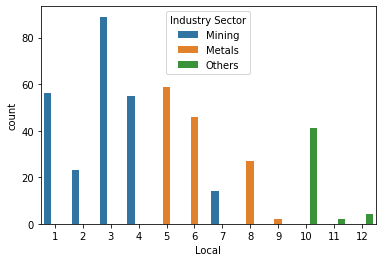

In [53]:
sns.countplot(x="Local",hue="Industry Sector", data=data)

In [54]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Local'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Local')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Industry Sector  and   Local
------------------------------------------------------


Local,1,2,3,4,5,6,7,8,9,10,11,12
Industry Sector,,,,,,,,,,,,
Metals,0,0,0,0,59,46,0,27,2,0,0,0
Mining,56,23,89,55,0,0,14,0,0,0,0,0
Others,0,0,0,0,0,0,0,0,0,41,2,4


Many accidents happened with a local 3 and industrial sector mining. i.e- more than 80. Least accidents took place with local 11 and industrial sector others.

##### 5. Industry Sector Vs Year

<AxesSubplot:xlabel='Year', ylabel='count'>

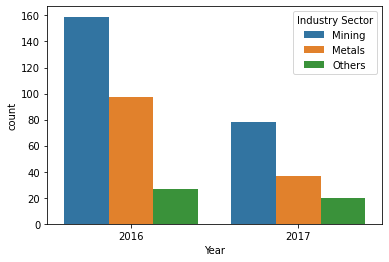

In [55]:
#Count plot to determine the number of accidents taken place in year 2016 and 2017 according to the industrial sector
sns.countplot(x="Year",hue="Industry Sector", data=data)

In [56]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Year'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Industry Sector  and   Year
------------------------------------------------------


Year,2016,2017
Industry Sector,,
Metals,97,37
Mining,159,78
Others,27,20


#### From the above plot, the following could be determined

1.The number of accidents taken place in year 2016 for mining sector is 160.

2.The number of accidents taken place in year 2016 wrt metals sector is about 100.

3.The number of accidents taken place in the year 2016 wrt others sector is about 30.
Hence, it can be determined that maximum accidents took place in mining sector in the year 2016.

4.The number of accidents taken place in the year 2017 wrt mining sector is 80.

5.The number of accidents taken place in the year 2017 wrt metals sector is about 40.

6.The number of accidents taken place in the year 2017 wrt others sector is 20.

Hence, it can be determined that max accidents took place in mining sector in the year 2017

##### 6. Industry Sector Vs Month

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

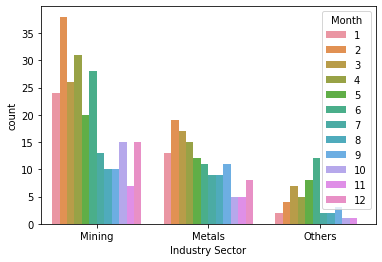

In [57]:
#Count plot to determine the accidents taken place in all the months wrt industrial sector
sns.countplot(x="Industry Sector",hue="Month", data=data)

In [58]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Month'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Month')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Industry Sector  and   Month
------------------------------------------------------


Month,1,2,3,4,5,6,7,8,9,10,11,12
Industry Sector,,,,,,,,,,,,
Metals,13,19,17,15,12,11,9,9,11,5,5,8
Mining,24,38,26,31,20,28,13,10,10,15,7,15
Others,2,4,7,5,8,12,2,2,3,1,1,0


Maximum number of accidents happened in the month feb and mining sector. The least number of accidents took place in the others sector and month december.

##### 7.Industry sector vs Weekday

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

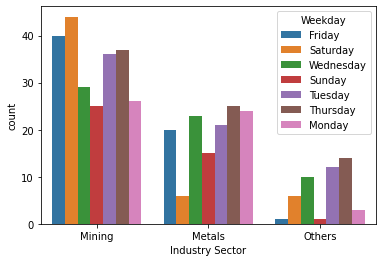

In [59]:
sns.countplot(x="Industry Sector",hue="Weekday", data=data)

In [60]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Weekday'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Weekday')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Industry Sector  and   Weekday
------------------------------------------------------


Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Industry Sector,,,,,,,
Metals,20,24,6,15,25,21,23
Mining,40,26,44,25,37,36,29
Others,1,3,6,1,14,12,10


Maximum number of accidents hapenned on the day saturday in the mining sector. i.e- more than 40. The least number of accidents happened on the day sunday in the others sector.

##### 8. Industry sector Vs country

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

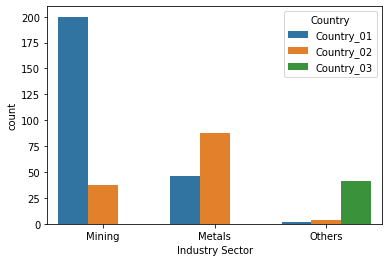

In [61]:
sns.countplot(x="Industry Sector",hue="Country", data=data)

In [62]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Country'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Country')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Industry Sector  and   Country
------------------------------------------------------


Country,Country_01,Country_02,Country_03
Industry Sector,,,
Metals,46,88,0
Mining,200,37,0
Others,2,4,41


From the above count plot, it is evident that the maximum number of accidents took place in country_01 and mining sector.i.e- 200. The least number of accidents took place in country _01 and others sector.

##### 9.Industry Sector Vs nature of employee

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

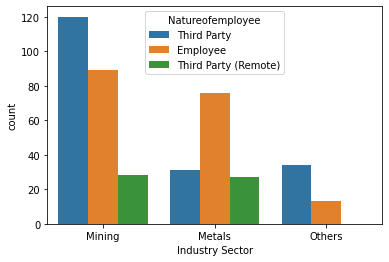

In [63]:
sns.countplot(x="Industry Sector",hue="Natureofemployee", data=data)

In [64]:
bivariate_analysis_df = pd.crosstab(index=data['Industry Sector'],columns=data['Natureofemployee'])

print("\n Cross table Analysis of features: ",'Industry Sector',' and  ', 'Natureofemployee')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Industry Sector  and   Natureofemployee
------------------------------------------------------


Natureofemployee,Employee,Third Party,Third Party (Remote)
Industry Sector,,,
Metals,76,31,27
Mining,89,120,28
Others,13,34,0


From the above count plot, it is clearly evident that the maximum accidents took place in the mining sector with the third party employee type. i.e- about 120. The least number of accidents took place in the others sectors with the nature of employee as employee.

### Country vs RestAll

##### 1. Country vs Year

<AxesSubplot:xlabel='Country', ylabel='count'>

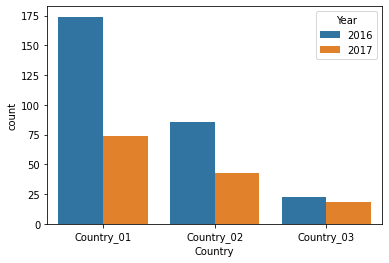

In [65]:
sns.countplot(x="Country",hue="Year", data=data)

In [66]:
bivariate_analysis_df = pd.crosstab(index=data['Country'],columns=data['Year'])

print("\n Cross table Analysis of features: ",'Country',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Country  and   Year
------------------------------------------------------


Year,2016,2017
Country,,
Country_01,174,74
Country_02,86,43
Country_03,23,18


From the above output, the following can be determined-

1.The number of accidents taken place in country_01 and year 2016 is 174.

2.The number of accidents taken place in country_01 and year 2017 is about 74.

3.The number of accidents taken place in country_02 and year 2016 is more than 86.

4.The number of accidents taken place in country_02 and year 2017 is about 43.

5.The number of accidents taken place in country_03 and year 2016 is about 23.

6.The number of accidents taken place in country_03 and year 2017 is about 18.

##### 2. Country Vs accident level

<AxesSubplot:xlabel='Country', ylabel='count'>

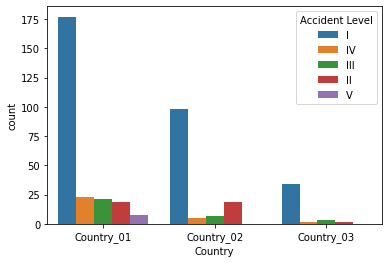

In [67]:
sns.countplot(x="Country",hue="Accident Level", data=data)

In [68]:
bivariate_analysis_df = pd.crosstab(index=data['Country'],columns=data['Accident Level'])

print("\n Cross table Analysis of features: ",'Country',' and  ', 'Accident Level')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Country  and   Accident Level
------------------------------------------------------


Accident Level,I,II,III,IV,V
Country,,,,,
Country_01,177,19,21,23,8
Country_02,98,19,7,5,0
Country_03,34,2,3,2,0


From the above count plot, it is clearly evident that the maximum number of accidents took place in accident level 1 and country_01.

##### 3. Country Vs Potential Accident Level

<AxesSubplot:xlabel='Country', ylabel='count'>

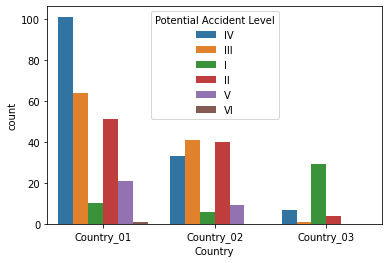

In [69]:
sns.countplot(x="Country",hue="Potential Accident Level", data=data)

In [70]:
bivariate_analysis_df = pd.crosstab(index=data['Country'],columns=data['Potential Accident Level'])

print("\n Cross table Analysis of features: ",'Country',' and  ', 'Potential Accident Level')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Country  and   Potential Accident Level
------------------------------------------------------


Potential Accident Level,I,II,III,IV,V,VI
Country,,,,,,
Country_01,10,51,64,101,21,1
Country_02,6,40,41,33,9,0
Country_03,29,4,1,7,0,0


From the above plot, it is evident that the maximum accidents occurred in country_01 and potential accident level 3.

#### 4. Country Vs Local

<AxesSubplot:xlabel='Country', ylabel='count'>

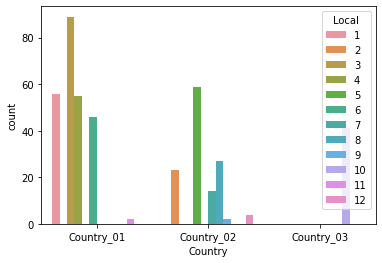

In [71]:
sns.countplot(x="Country",hue="Local", data=data)

In [72]:
bivariate_analysis_df = pd.crosstab(index=data['Country'],columns=data['Local'])

print("\n Cross table Analysis of features: ",'Country',' and  ', 'Local')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Country  and   Local
------------------------------------------------------


Local,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Country_01,56,0,89,55,0,46,0,0,0,0,2,0
Country_02,0,23,0,0,59,0,14,27,2,0,0,4
Country_03,0,0,0,0,0,0,0,0,0,41,0,0


Country 1 is more dominant in local 3 region and least dominant in Local 12

##### 5.Country Vs Nature Of Employee

<AxesSubplot:xlabel='Country', ylabel='count'>

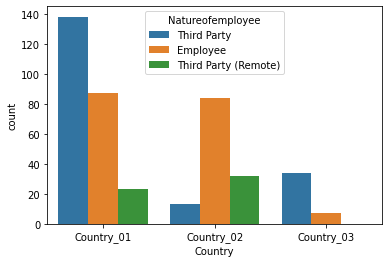

In [73]:
sns.countplot(x="Country",hue="Natureofemployee", data=data)

In [74]:
bivariate_analysis_df = pd.crosstab(index=data['Country'],columns=data['Natureofemployee'])

print("\n Cross table Analysis of features: ",'Country',' and  ', 'Natureofemployee')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Country  and   Natureofemployee
------------------------------------------------------


Natureofemployee,Employee,Third Party,Third Party (Remote)
Country,,,
Country_01,87,138,23
Country_02,84,13,32
Country_03,7,34,0


Accidents in Country 01 is more dominant in Third Party type of employee, country 03 is least dominant in Third Party (Remote)

##### 6. Country Vs Critical Risk

<AxesSubplot:xlabel='Country', ylabel='count'>

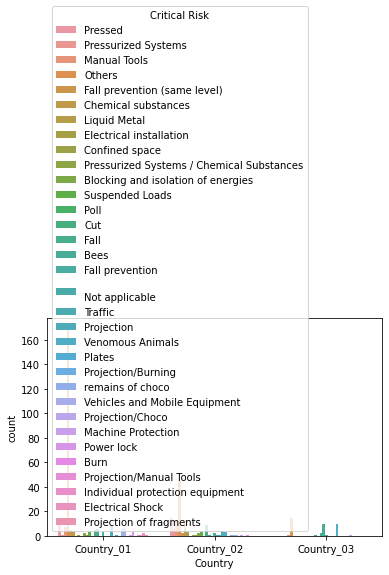

In [75]:
sns.countplot(x="Country",hue="Critical Risk", data=data)

In [76]:
bivariate_analysis_df = pd.crosstab(index=data['Critical Risk'],columns=data['Country'])

print("\n Cross table Analysis of features: ",'Country',' and  ', 'Critical Risk')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Country  and   Critical Risk
------------------------------------------------------


Country,Country_01,Country_02,Country_03
Critical Risk,,,
\nNot applicable,0,1,0
Bees,0,0,10
Blocking and isolation of energies,1,2,0
Burn,0,1,0
Chemical substances,4,13,0
Confined space,0,1,0
Cut,5,9,0
Electrical Shock,2,0,0
Electrical installation,1,0,0


Country 01 is more dominant in Others Critical Risk and Critical Risk is least dominant in Country 03 

### Local Vs Rest All

##### 1. Local Vs Accident Level

<AxesSubplot:xlabel='Local', ylabel='count'>

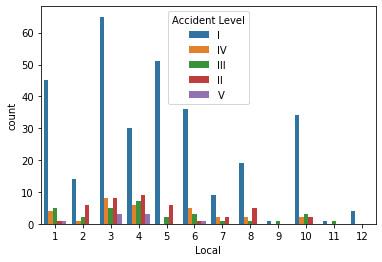

In [77]:
sns.countplot(x="Local",hue="Accident Level", data=data)

In [78]:
bivariate_analysis_df = pd.crosstab(index=data['Accident Level'],columns=data['Local'])

print("\n Cross table Analysis of features: ",'Local',' and  ', 'Accident Level')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Local  and   Accident Level
------------------------------------------------------


Local,1,2,3,4,5,6,7,8,9,10,11,12
Accident Level,,,,,,,,,,,,
I,45,14,65,30,51,36,9,19,1,34,1,4
II,1,6,8,9,6,1,2,5,0,2,0,0
III,5,2,5,7,2,3,1,1,1,3,1,0
IV,4,1,8,6,0,5,2,2,0,2,0,0
V,1,0,3,3,0,1,0,0,0,0,0,0


Accident level 1 is more dominant in Local 2 region with 65 accidents, while Accident Level V is least across all Locals

##### 2. Local Vs Potential Accident Level

<AxesSubplot:xlabel='Local', ylabel='count'>

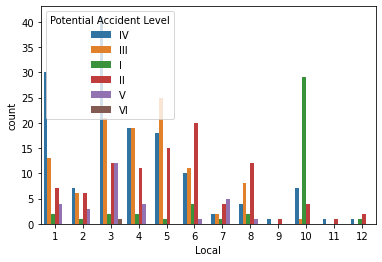

In [79]:
sns.countplot(x="Local",hue="Potential Accident Level", data=data)

In [80]:
bivariate_analysis_df = pd.crosstab(index=data['Potential Accident Level'],columns=data['Local'])

print("\n Cross table Analysis of features: ",'Local',' and  ', 'Potential Accident Level')
print("------------------------------------------------------")
display(bivariate_analysis_df) 


 Cross table Analysis of features:  Local  and   Potential Accident Level
------------------------------------------------------


Local,1,2,3,4,5,6,7,8,9,10,11,12
Potential Accident Level,,,,,,,,,,,,
I,2,1,2,2,1,4,1,2,0,29,0,1
II,7,6,12,11,15,20,4,12,1,4,1,2
III,13,6,21,19,25,11,2,8,0,1,0,0
IV,30,7,41,19,18,10,2,4,1,7,1,1
V,4,3,12,4,0,1,5,1,0,0,0,0
VI,0,0,1,0,0,0,0,0,0,0,0,0


Overall Local 3 is more prone to Multiple potential accidents, while local 12 is the least

##### 3. Local Vs Natureofemployee

<AxesSubplot:xlabel='Local', ylabel='count'>

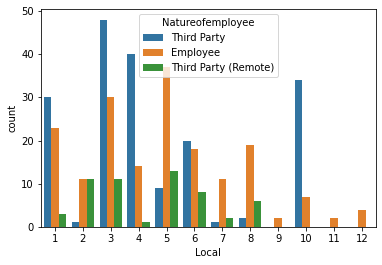

In [81]:
sns.countplot(x="Local",hue="Natureofemployee", data=data)

In [82]:
bivariate_analysis_df = pd.crosstab(index=data['Natureofemployee'],columns=data['Local'])

print("\n Cross table Analysis of features: ",'Local',' and  ', 'Natureofemployee')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Local  and   Natureofemployee
------------------------------------------------------


Local,1,2,3,4,5,6,7,8,9,10,11,12
Natureofemployee,,,,,,,,,,,,
Employee,23,11,30,14,37,18,11,19,2,7,2,4
Third Party,30,1,48,40,9,20,1,2,0,34,0,0
Third Party (Remote),3,11,11,1,13,8,2,6,0,0,0,0


Type Employee is more dominant across all Locals, while Type Third Party(Remote) is least dominant across all Locals

##### 4. Local Vs Critical Risk

<AxesSubplot:xlabel='Local', ylabel='count'>

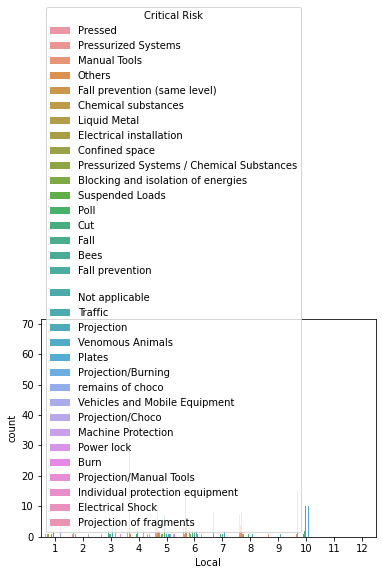

In [83]:
sns.countplot(x="Local",hue="Critical Risk", data=data)

In [84]:
bivariate_analysis_df = pd.crosstab(index=data['Critical Risk'],columns=data['Local'])

print("\n Cross table Analysis of features: ",'Local',' and  ', 'Critical Risk')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Local  and   Critical Risk
------------------------------------------------------


Local,1,2,3,4,5,6,7,8,9,10,11,12
Critical Risk,,,,,,,,,,,,
\nNot applicable,0,0,0,0,0,0,0,1,0,0,0,0
Bees,0,0,0,0,0,0,0,0,0,10,0,0
Blocking and isolation of energies,0,0,0,0,1,1,0,1,0,0,0,0
Burn,0,0,0,0,1,0,0,0,0,0,0,0
Chemical substances,1,1,0,0,11,3,0,1,0,0,0,0
Confined space,0,0,0,0,1,0,0,0,0,0,0,0
Cut,0,0,2,1,7,2,1,1,0,0,0,0
Electrical Shock,0,0,2,0,0,0,0,0,0,0,0,0
Electrical installation,1,0,0,0,0,0,0,0,0,0,0,0


Critical Risk of type "Others" is dominant across all Locals

##### 5. Local Vs Year

<AxesSubplot:xlabel='Local', ylabel='count'>

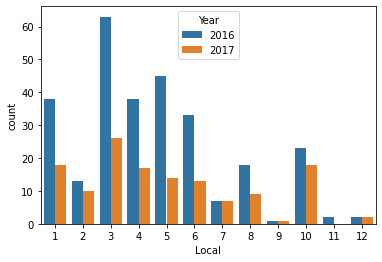

In [85]:
sns.countplot(x="Local",hue="Year", data=data)

In [86]:
bivariate_analysis_df = pd.crosstab(index=data['Year'],columns=data['Local'])

print("\n Cross table Analysis of features: ",'Local',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Local  and   Year
------------------------------------------------------


Local,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,38,13,63,38,45,33,7,18,1,23,2,2
2017,18,10,26,17,14,13,7,9,1,18,0,2


Year 2016 has more accidents across all Local regions compared to 2017

### Accident Level Vs Rest All

##### 1. Accident Level Vs Potential Accident Level

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

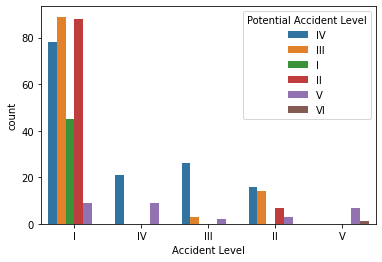

In [87]:
sns.countplot(x="Accident Level",hue="Potential Accident Level", data=data)

In [88]:
bivariate_analysis_df = pd.crosstab(index=data['Potential Accident Level'],columns=data['Accident Level'])

print("\n Cross table Analysis of features: ",'Accident Level',' and  ', 'Potential Accident Level')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Accident Level  and   Potential Accident Level
------------------------------------------------------


Accident Level,I,II,III,IV,V
Potential Accident Level,,,,,
I,45,0,0,0,0
II,88,7,0,0,0
III,89,14,3,0,0
IV,78,16,26,21,0
V,9,3,2,9,7
VI,0,0,0,0,1


Accident Level I is more related to Potential Accident levels of I, II, III, IV, V, VI

##### 2. Accident Level Vs Natureofemployee

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

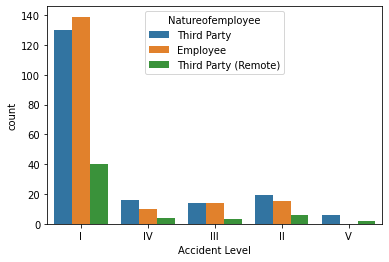

In [89]:
sns.countplot(x="Accident Level",hue="Natureofemployee", data=data)

In [90]:
bivariate_analysis_df = pd.crosstab(index=data['Accident Level'],columns=data['Natureofemployee'])

print("\n Cross table Analysis of features: ",'Accident Level',' and  ', 'Natureofemployee')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Accident Level  and   Natureofemployee
------------------------------------------------------


Natureofemployee,Employee,Third Party,Third Party (Remote)
Accident Level,,,
I,139,130,40
II,15,19,6
III,14,14,3
IV,10,16,4
V,0,6,2


Accident Level I is more dominant across all Employee types, where Level V is least across all types

##### 3. Accident Level Vs Critical Risk

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

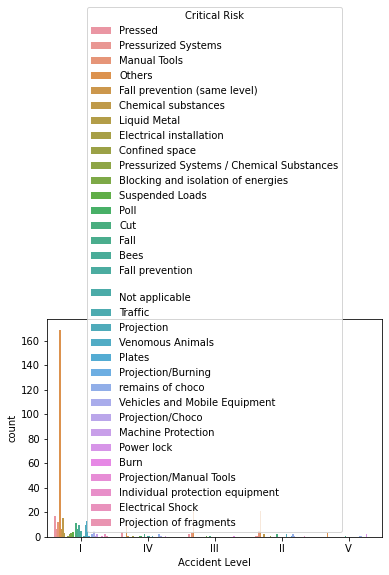

In [114]:
sns.countplot(x="Accident Level",hue="Critical Risk", data=data)

In [104]:
bivariate_analysis_df = pd.crosstab(index=data['Critical Risk'],columns=data['Accident Level'])

print("\n Cross table Analysis of features: ",'Accident Level',' and  ', 'Critical Risk')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Accident Level  and   Critical Risk
------------------------------------------------------


Accident Level,I,II,III,IV,V
Critical Risk,,,,,
\nNot applicable,0,0,0,1,0
Bees,10,0,0,0,0
Blocking and isolation of energies,3,0,0,0,0
Burn,0,0,1,0,0
Chemical substances,15,2,0,0,0
Confined space,1,0,0,0,0
Cut,11,2,1,0,0
Electrical Shock,2,0,0,0,0
Electrical installation,0,0,0,1,0


Accident Level I is more domaint with Other critical Risk type

##### 4. Accident Level Vs Year

<AxesSubplot:xlabel='Accident Level', ylabel='count'>

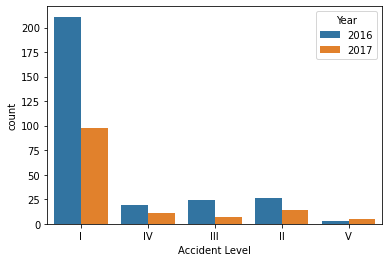

In [106]:
sns.countplot(x="Accident Level",hue="Year", data=data)

In [108]:
bivariate_analysis_df = pd.crosstab(index=data['Year'],columns=data['Accident Level'])

print("\n Cross table Analysis of features: ",'Accident Level',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Accident Level  and   Year
------------------------------------------------------


Accident Level,I,II,III,IV,V
Year,,,,,
2016,211,26,24,19,3
2017,98,14,7,11,5


Accident Level I is more dominant in across 2016 and 2017 years, and Level V is minimum

#### 5. Accident Level Vs Month

<AxesSubplot:xlabel='Month', ylabel='count'>

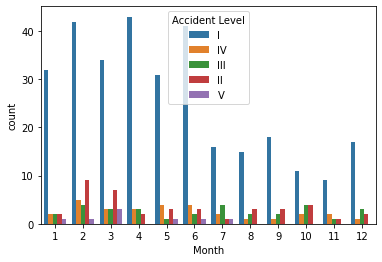

In [110]:
sns.countplot(x="Month",hue="Accident Level", data=data)

In [112]:
bivariate_analysis_df = pd.crosstab(index=data['Accident Level'],columns=data['Month'])

print("\n Cross table Analysis of features: ",'Accident Level',' and  ', 'Month')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Accident Level  and   Year
------------------------------------------------------


Month,1,2,3,4,5,6,7,8,9,10,11,12
Accident Level,,,,,,,,,,,,
I,32,42,34,43,31,41,16,15,18,11,9,17
II,2,9,7,2,3,3,1,3,3,4,1,2
III,2,4,3,3,1,2,4,2,2,4,1,3
IV,2,5,3,3,4,4,2,1,1,2,2,1
V,1,1,3,0,1,1,1,0,0,0,0,0


Accident Level 1 dominates across all Months while Level V is minimum

#### 6. Accident Level Vs Country

<AxesSubplot:xlabel='Country', ylabel='count'>

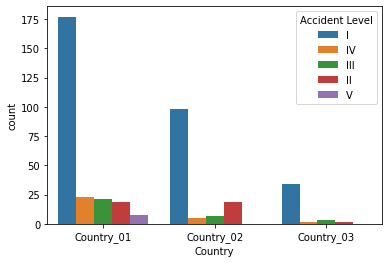

In [124]:
sns.countplot(x="Country",hue="Accident Level", data=data)

In [125]:
bivariate_analysis_df = pd.crosstab(index=data['Accident Level'],columns=data['Country'])

print("\n Cross table Analysis of features: ",'Accident Level',' and  ', 'Country')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Accident Level  and   Country
------------------------------------------------------


Country,Country_01,Country_02,Country_03
Accident Level,,,
I,177,98,34
II,19,19,2
III,21,7,3
IV,23,5,2
V,8,0,0


Accident Level I is more dominant across all Countries, while Accident Level V is least dominant across all countries

### Potential Accident Level Vs Rest All(Remaining uncoverd)

##### 1. Potential Accident Level Vs Natureofemployee

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

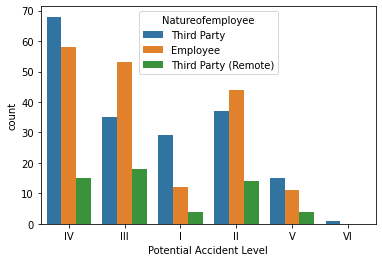

In [115]:
sns.countplot(x="Potential Accident Level",hue="Natureofemployee", data=data)

In [116]:
bivariate_analysis_df = pd.crosstab(index=data['Potential Accident Level'],columns=data['Natureofemployee'])

print("\n Cross table Analysis of features: ",'Potential Accident Level',' and  ', 'Natureofemployee')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Potential Accident Level  and   Natureofemployee
------------------------------------------------------


Natureofemployee,Employee,Third Party,Third Party (Remote)
Potential Accident Level,,,
I,12,29,4
II,44,37,14
III,53,35,18
IV,58,68,15
V,11,15,4
VI,0,1,0


Potential Accident level IV dominents in ThirdParty, while VI is least dominant in Third Party(Remote) across all

##### 2. Potential Accident Level Vs Critical Risk

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

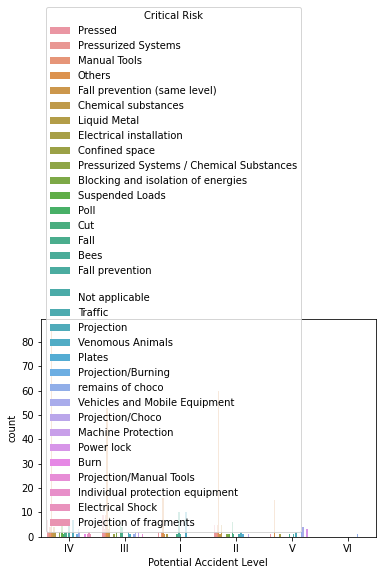

In [119]:
sns.countplot(x="Potential Accident Level",hue="Critical Risk", data=data)

In [121]:
bivariate_analysis_df = pd.crosstab(index=data['Critical Risk'],columns=data['Potential Accident Level'])

print("\n Cross table Analysis of features: ",'Potential Accident Level',' and  ', 'Critical Risk')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Potential Accident Level  and   Critical Risk
------------------------------------------------------


Potential Accident Level,I,II,III,IV,V,VI
Critical Risk,,,,,,
\nNot applicable,0,0,0,0,1,0
Bees,10,0,0,0,0,0
Blocking and isolation of energies,0,1,2,0,0,0
Burn,0,0,0,1,0,0
Chemical substances,0,5,8,4,0,0
Confined space,0,0,1,0,0,0
Cut,1,6,5,2,0,0
Electrical Shock,0,0,0,2,0,0
Electrical installation,0,0,0,0,1,0


Among all Critical Risk with Type as "Others" is dominant across all Potential Accident Levels

<AxesSubplot:xlabel='Accident Level', ylabel='Month'>

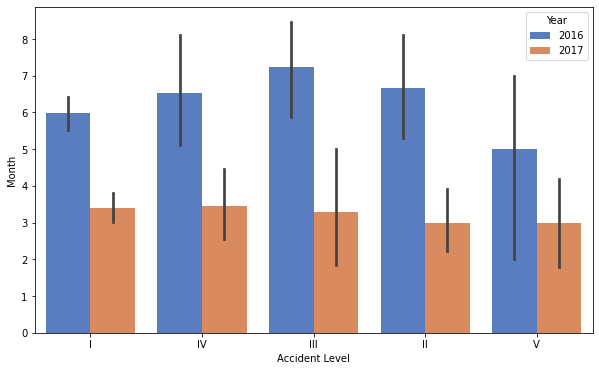

In [154]:
plt.figure(figsize=(10,6))
sns.barplot(data['Accident Level'], data['Month'], hue=data['Year'], palette='muted') 

##### 3. Potential Accident Level Vs Year

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

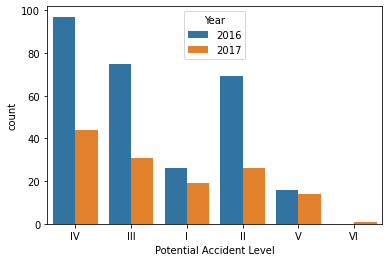

In [122]:
sns.countplot(x="Potential Accident Level",hue="Year", data=data)

In [123]:
bivariate_analysis_df = pd.crosstab(index=data['Potential Accident Level'],columns=data['Year'])

print("\n Cross table Analysis of features: ",'Potential Accident Level',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Potential Accident Level  and   Year
------------------------------------------------------


Year,2016,2017
Potential Accident Level,,
I,26,19
II,69,26
III,75,31
IV,97,44
V,16,14
VI,0,1


There is Decrease in Number of accidents across all Potential Accident level from 2016 to 2017. Potential Accident level IV is dominant in both 2016 and 2017

#### 4. Potential Accident Level Vs Country

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

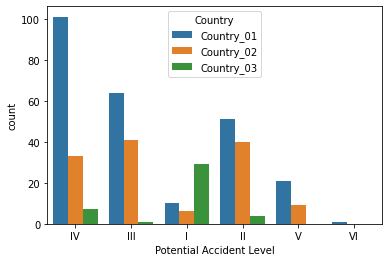

In [129]:
sns.countplot(x="Potential Accident Level",hue="Country", data=data)

In [130]:
bivariate_analysis_df = pd.crosstab(index=data['Potential Accident Level'],columns=data['Country'])

print("\n Cross table Analysis of features: ",'Potential Accident Level',' and  ', 'Country')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Potential Accident Level  and   Country
------------------------------------------------------


Country,Country_01,Country_02,Country_03
Potential Accident Level,,,
I,10,6,29
II,51,40,4
III,64,41,1
IV,101,33,7
V,21,9,0
VI,1,0,0


Potential Accident Level IV is dominant across all countries, while with VI least number of accidents happenned 

### Natureofemployee Vs RestAll

##### 1. Natureofemployee Vs Critical Risk

<AxesSubplot:xlabel='Natureofemployee', ylabel='count'>

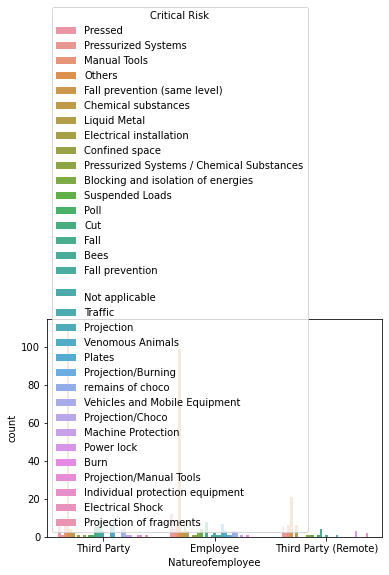

In [135]:
sns.countplot(x="Natureofemployee",hue="Critical Risk", data=data)

In [137]:
bivariate_analysis_df = pd.crosstab(index=data['Critical Risk'],columns=data['Natureofemployee'])

print("\n Cross table Analysis of features: ",'Critical Risk',' and  ', 'Natureofemployee')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Critical Risk  and   Natureofemployee
------------------------------------------------------


Natureofemployee,Employee,Third Party,Third Party (Remote)
Critical Risk,,,
\nNot applicable,1,0,0
Bees,1,9,0
Blocking and isolation of energies,2,0,1
Burn,1,0,0
Chemical substances,9,2,6
Confined space,1,0,0
Cut,8,5,1
Electrical Shock,0,0,2
Electrical installation,0,1,0


Critical Risk of type "Others" is dominant across all Types of Employees

### Year Vs RestAll

##### 1. Year vs month

<AxesSubplot:xlabel='Month', ylabel='count'>

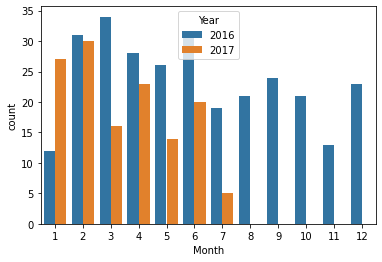

In [93]:
sns.countplot(x="Month",hue="Year", data=data)

In [144]:
bivariate_analysis_df = pd.crosstab(index=data['Month'],columns=data['Year'])

print("\n Cross table Analysis of features: ",'Month',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Month  and   Year
------------------------------------------------------


Year,2016,2017
Month,,
1,12,27
2,31,30
3,34,16
4,28,23
5,26,14
6,31,20
7,19,5
8,21,0
9,24,0


From the above plot, it is evident that the max accidents happened in the year 2016 and march.

##### 2. Year vs Local

<AxesSubplot:xlabel='Local', ylabel='count'>

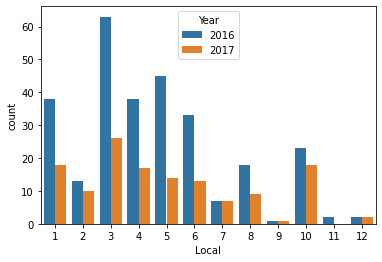

In [94]:
sns.countplot(x="Local",hue="Year", data=data)

In [147]:
bivariate_analysis_df = pd.crosstab(index=data['Year'],columns=data['Local'])

print("\n Cross table Analysis of features: ",'Local',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Local  and   Year
------------------------------------------------------


Local,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,38,13,63,38,45,33,7,18,1,23,2,2
2017,18,10,26,17,14,13,7,9,1,18,0,2


From the above plot, it can be determined that the maximum accidents took place in the local 3 and year 2016.

##### 3. Year vs Weekday

<AxesSubplot:xlabel='Weekday', ylabel='count'>

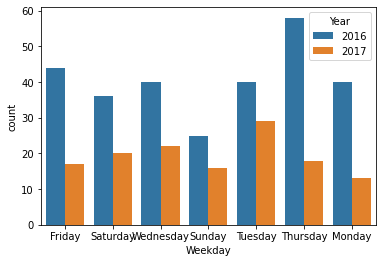

In [95]:
sns.countplot(x="Weekday",hue="Year", data=data)

In [148]:
bivariate_analysis_df = pd.crosstab(index=data['Year'],columns=data['Weekday'])

print("\n Cross table Analysis of features: ",'Weekday',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Weekday  and   Year
------------------------------------------------------


Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2016,44,40,36,25,58,40,40
2017,17,13,20,16,18,29,22


From the above plot, it is clearly evident that maximum number of accidents took place on thursday and year 2016.

#### 4.Year vs Critical Risk

<AxesSubplot:xlabel='Year', ylabel='count'>

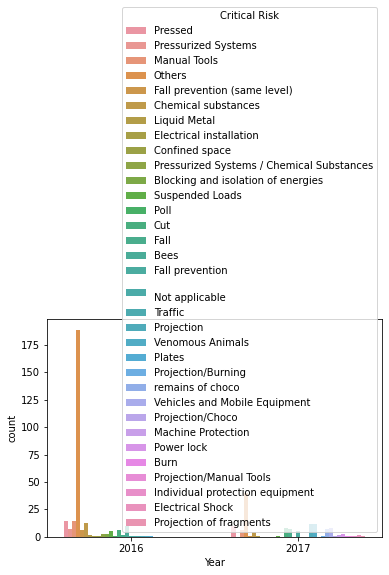

In [96]:
sns.countplot(x="Year",hue="Critical Risk", data=data)

In [150]:
bivariate_analysis_df = pd.crosstab(index=data['Critical Risk'],columns=data['Year'])

print("\n Cross table Analysis of features: ",'Critical Risk',' and  ', 'Year')
print("------------------------------------------------------")
display(bivariate_analysis_df)


 Cross table Analysis of features:  Critical Risk  and   Year
------------------------------------------------------


Year,2016,2017
Critical Risk,,
\nNot applicable,1,0
Bees,10,0
Blocking and isolation of energies,3,0
Burn,0,1
Chemical substances,13,4
Confined space,1,0
Cut,6,8
Electrical Shock,0,2
Electrical installation,1,0


From the above plot, it is clearly evident that maximum number of accidents took place with "Others" and year 2016.

### Multivariate analysis

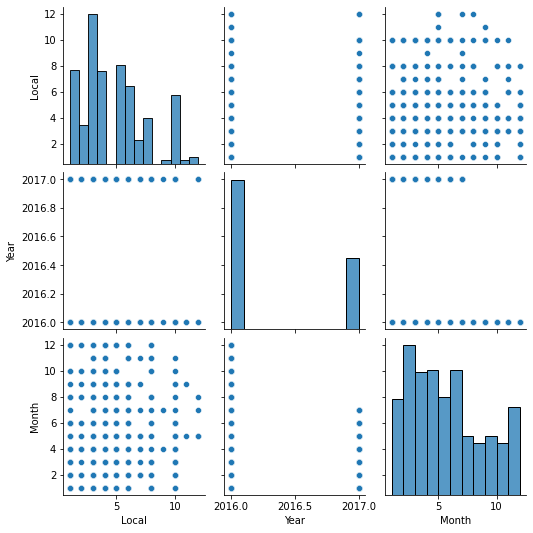

In [152]:
#Pair plot
sns.pairplot(data)

In [153]:
data.corr()

,Local,Year,Month
Local,1.000000,0.054246,0.019061
Year,0.054246,1.000000,-0.416621
Month,0.019061,-0.416621,1.000000


From the above Correlation diagram its clear that "Local" and "Year" are moderately correlated

In [100]:
####!pip install pandas_profiling

In [101]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]